# Transform scaling

In [1]:
import numpy as np
from numpy import logspace, linspace
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
import scipy.integrate
from scipy import signal

plt.rcParams['figure.figsize'] = [8, 5.0]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.grid'] = True

%matplotlib inline
tlim = 3
tt = np.linspace(-tlim, tlim, 1000)
flim = 3
ff = np.linspace(-flim, flim, 1000)

from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, arg, atan2
from sympy.abc import A,B,t,f 

def nicegrid():
    plt.grid(True, which='major', color='#666666', linestyle=':')
    plt.grid(True, which='minor', color='#999999', linestyle=':', alpha=0.2)
    plt.minorticks_on()


## Create some scaled rect functions

In [2]:
ts = Symbol('t')

def my_rect(p):
    return Piecewise((0, t <= -p/2),(1, t <= p/2),(0, True))

p = Symbol('p')
sincu = lambda t,p: sinc(p*np.pi*t) # swithc to sinc ftn that evetyone else uses...

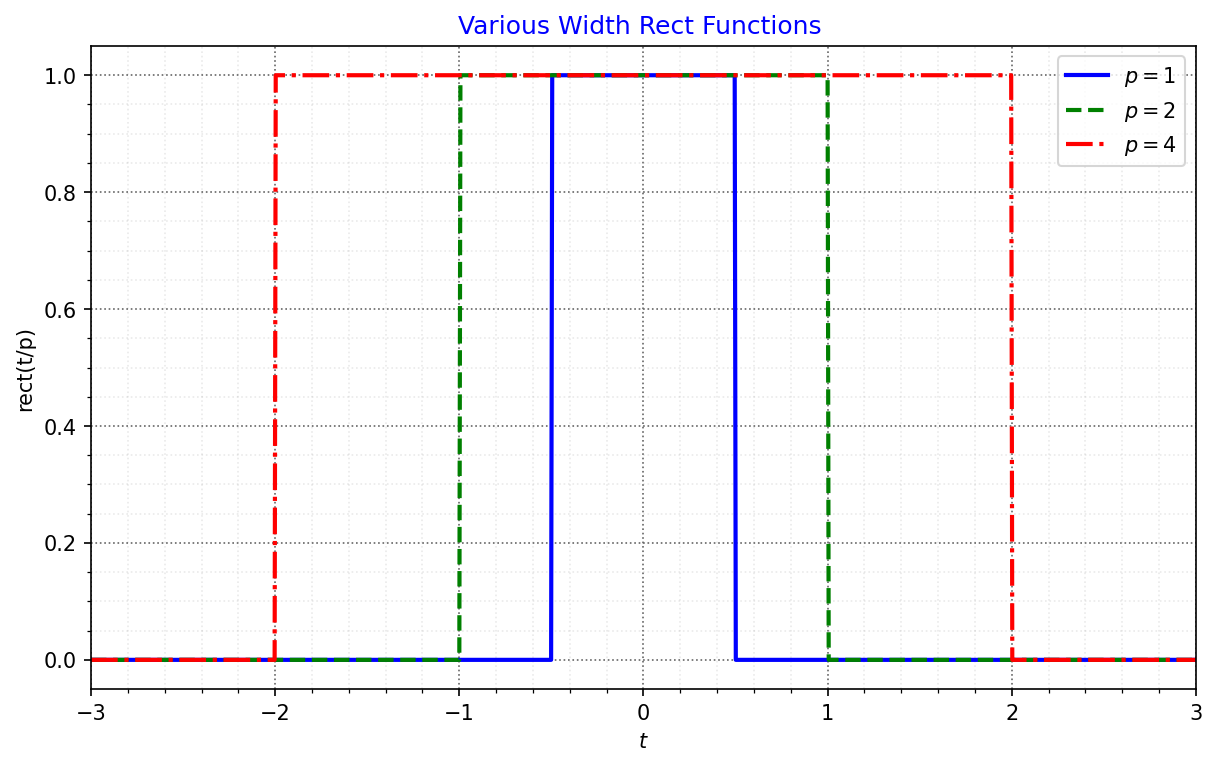

In [3]:
f1 = my_rect(1)
f2 = my_rect(2)
f4 = my_rect(4)

lam_f1 = lambdify([ts], f1, modules=['numpy'])
lam_f2 = lambdify([ts], f2, modules=['numpy'])
lam_f4 = lambdify([ts], f4, modules=['numpy'])

fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_f1(tt),'b',label='$p=1$')
plt.plot(tt, lam_f2(tt),'g--',label='$p=2$')
plt.plot(tt, lam_f4(tt),'r-.',label='$p=4$')

nicegrid()
plt.legend()
plt.xlim(-tlim,tlim)
plt.xlabel('$t$')
plt.ylabel('rect(t/p)')
plt.title('Various Width Rect Functions ')
plt.show()

## Now Transform the scaled rects

In [4]:
Q1 = fourier_transform(f1, t, f)
Q2 = fourier_transform(f2, t, f, noconds=False)
sQ2 = sympify(Q2)
Q4 = fourier_transform(f4, t, f, noconds=False)
sQ4 = sympify(Q4)

## Plotting the transformed scaled rects

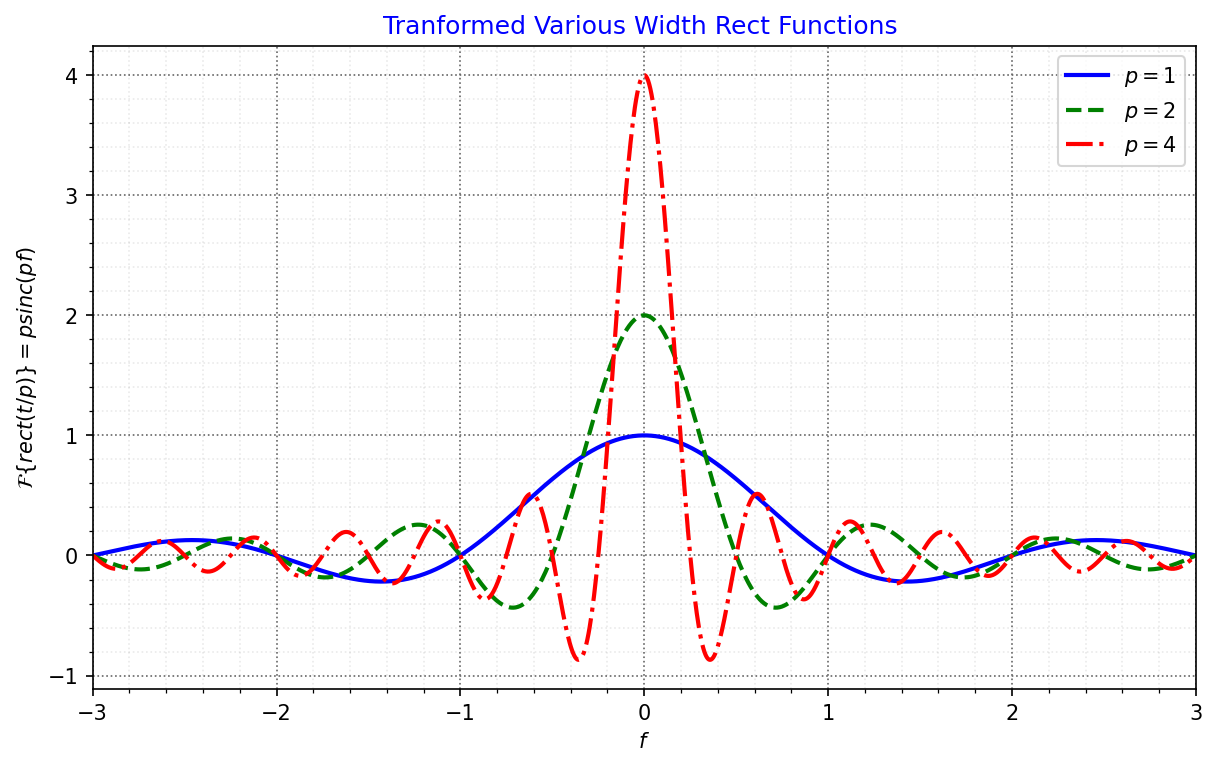

In [5]:
lam_Q1 = lambdify([f], Q1, modules=['numpy'])
lam_Q2 = lambdify([f], sQ2[0], modules=['numpy'])
lam_Q4 = lambdify([f], sQ4[0], modules=['numpy'])

fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(ff, lam_Q1(ff),'b',label='$p=1$')
plt.plot(ff, lam_Q2(ff),'g--',label='$p=2$')
plt.plot(ff, lam_Q4(ff),'r-.',label='$p=4$')

plt.legend()
plt.xlim(-flim,flim)
plt.xlabel('$f$')
plt.ylabel('${\cal F}\{rect(t/p)\} = p sinc (pf)$')
plt.title('Tranformed Various Width Rect Functions ')
nicegrid()
plt.show()

### Recall - Expected transform: ${\tt rect}(t/p) \Leftrightarrow p {\tt sinc}(pf)$

## Now try transforming ${\tt sinc}(pt)$

In [6]:
nf1 = sincu(t,1)
nf2 = sincu(t,2)
nf4 = sincu(t,4)

lam_nf1 = lambdify(t, nf1, modules=['numpy'])
lam_nf2 = lambdify(t, nf2, modules=['numpy'])
lam_nf4 = lambdify(t, nf4, modules=['numpy'])

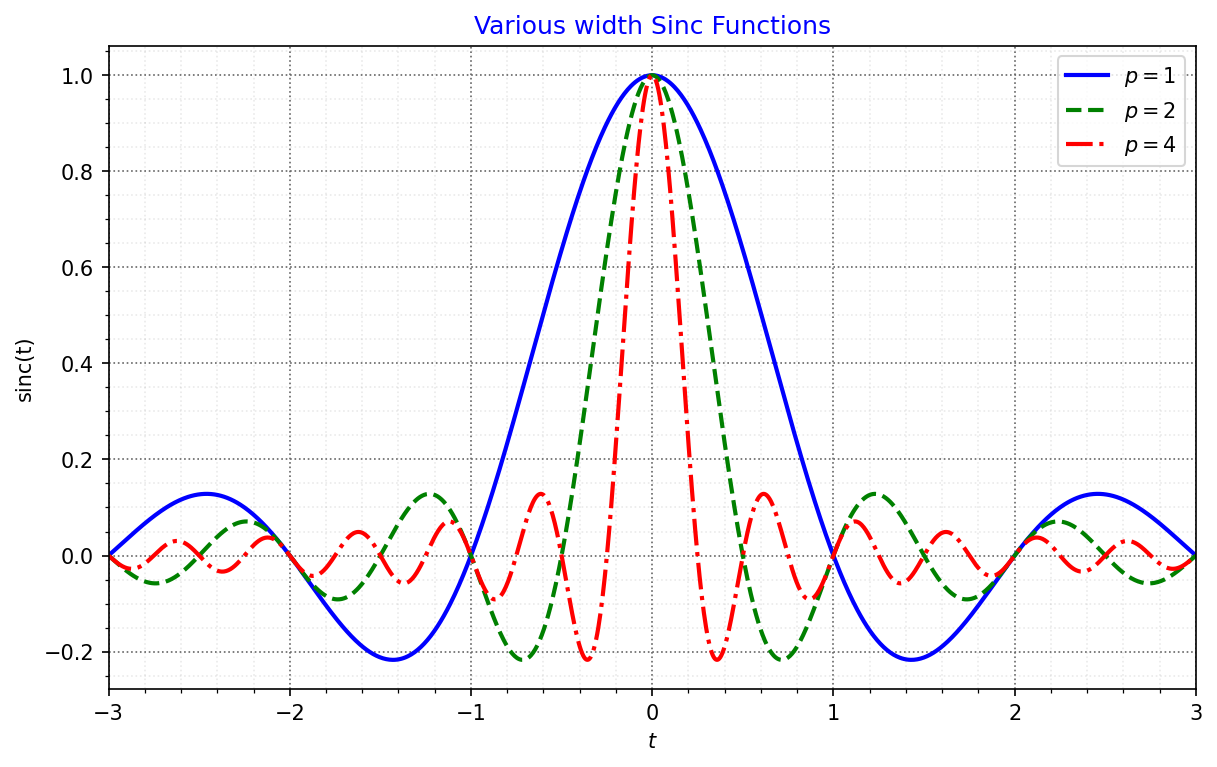

In [7]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_nf1(tt),'b',label='$p=1$')
plt.plot(tt, lam_nf2(tt),'g--',label='$p=2$')
plt.plot(tt, lam_nf4(tt),'r-.',label='$p=4$')

plt.legend()
plt.xlim(-tlim,tlim)
plt.xlabel('$t$')
plt.ylabel('sinc(t)')
plt.title('Various width Sinc Functions')
nicegrid()
plt.show()

### Transform and plot

In [8]:
nQ1 = fourier_transform(nf1, t, f)
nQ2 = fourier_transform(nf2, t, f)
nQ4 = fourier_transform(nf4, t, f)

lam_nQ1 = lambdify(f, nQ1, modules=['numpy'])
lam_nQ2 = lambdify(f, nQ2, modules=['numpy'])
lam_nQ4 = lambdify(f, nQ4, modules=['numpy'])

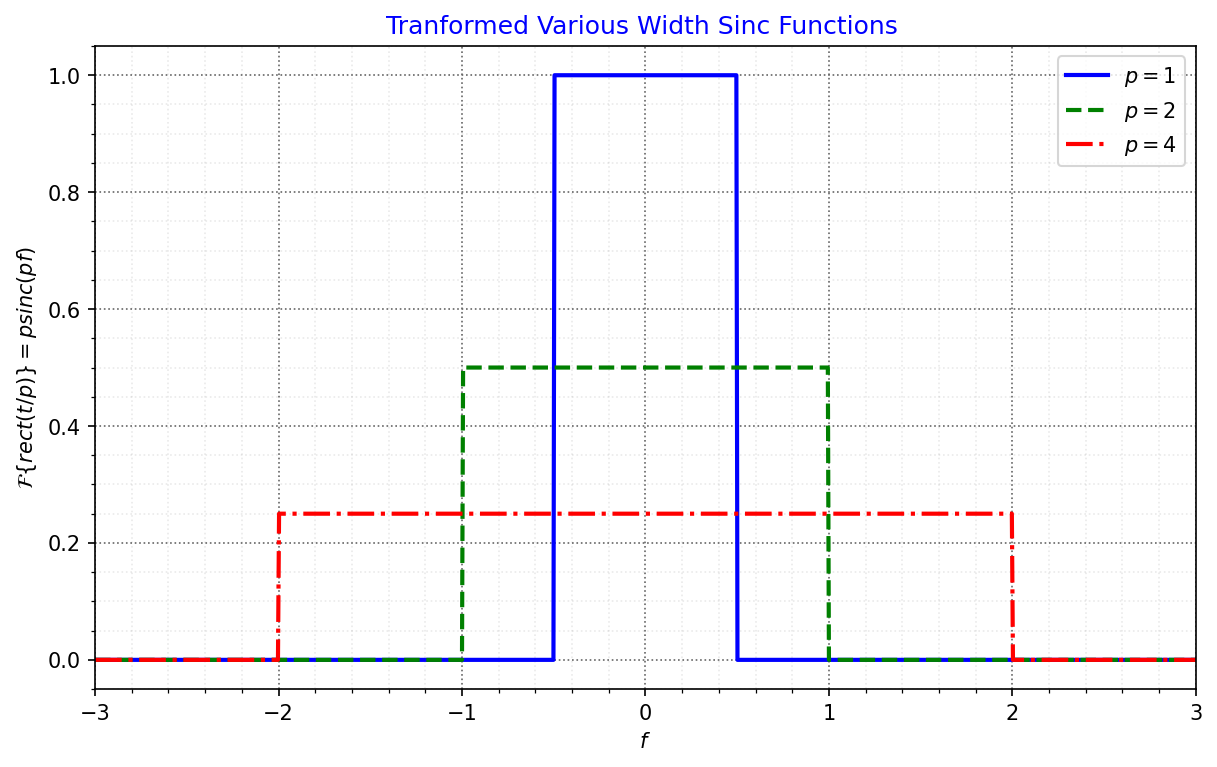

In [9]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(ff, lam_nQ1(ff),'b',label='$p=1$')
plt.plot(ff, lam_nQ2(ff),'g--',label='$p=2$')
plt.plot(ff, lam_nQ4(ff),'r-.',label='$p=4$')

plt.legend()
plt.xlim(-flim,flim)
plt.xlabel('$f$')
plt.ylabel('${\cal F}\{rect(t/p)\} = p sinc (pf)$')
plt.title('Tranformed Various Width Sinc Functions ')
nicegrid()
plt.show()

### Recall - Expected transform: ${\tt sinc}(pt) \Leftrightarrow (1/p) {\tt rect}(f/p)$

# Try $sinc(t-1)$

In [10]:
A = Symbol('A')
B = Symbol('B')
sincuAB = lambda t,A,B: sinc(np.pi*(A*t+B)) # swithc to sinc ftn that evetyone else uses...

nf1 = sincuAB(t,1,-1)
lam_nf1 = lambdify(t, nf1, modules=['numpy'])

nQ1 = fourier_transform(nf1, t, f)
lam_absnQ1 = lambdify(f, abs(nQ1), modules=['numpy'])
lam_argnQ1 = lambdify(f, arg(nQ1), modules=['numpy'])

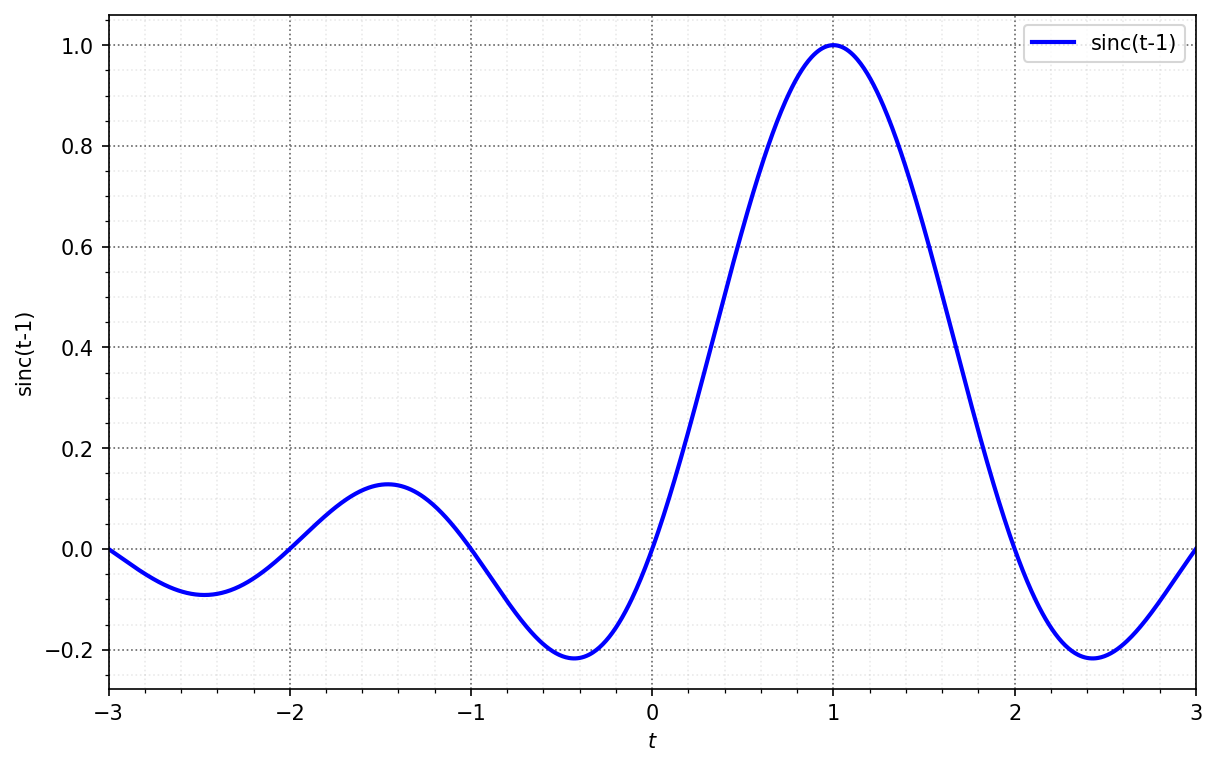

In [11]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_nf1(tt),'b',label='sinc(t-1)')
plt.legend()
plt.xlim(-tlim,tlim)
plt.xlabel('$t$')
plt.ylabel('sinc(t-1)')
nicegrid()
plt.show()

Text(0.5, 0, '$f$')

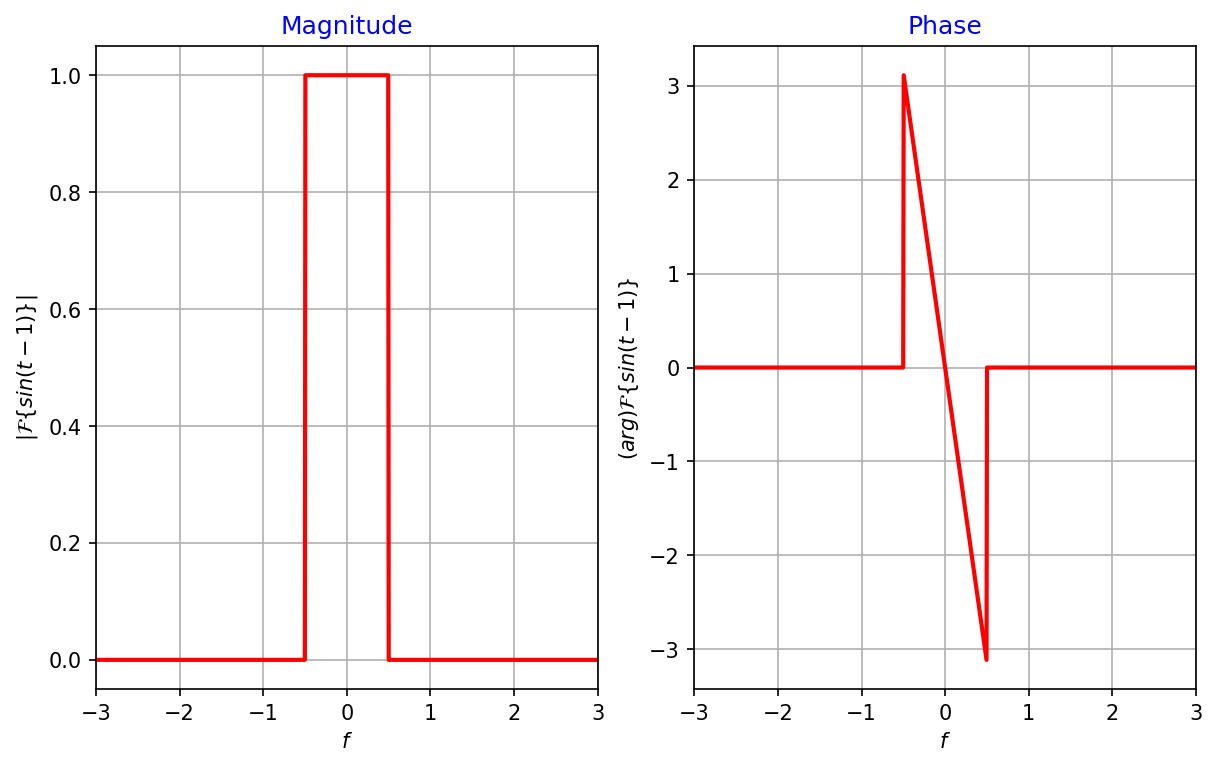

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5), dpi=150)
ax1.plot(ff, lam_absnQ1(ff), 'r-', lw=2)
ax1.set_title('Magnitude')
ax1.set_ylabel('$|{\cal F}\{ sin(t-1)\}|$')
ax1.set_xlabel('$f$')
    
ax2.plot(ff, lam_argnQ1(ff), 'r-', lw=2)
ax2.set_title('Phase')
ax2.set_ylabel('$(arg) {\cal F}\{ sin(t-1)\}$')
ax2.set_xlabel('$f$')


### Recall: Based on time shift property, expected transform ${\tt sinc} (t-1) = e^{-2\pi f j}{\tt rect}(f)$

## Example 7 in Topic 7

In [22]:
f7 = Piecewise((0, t <= -2),(t+2, t <= -1),(1, t <= 1),(2-t, t <= 2),(0, True))
lam_f7 = lambdify(t, f7, modules=['numpy'])
Q7 = fourier_transform(f7, t, f)
lam_Q7 = lambdify(f, Q7, modules=['numpy'])

# see section 7.5
def Q7_analytic(f):
    return (1+2*np.cos(2*np.pi*f))*np.sinc(f)**2 ## numpy sinc doesn't require the pi, sympy's does

/Applications/JupyterLab.app/Contents/Resources/jlab_server/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


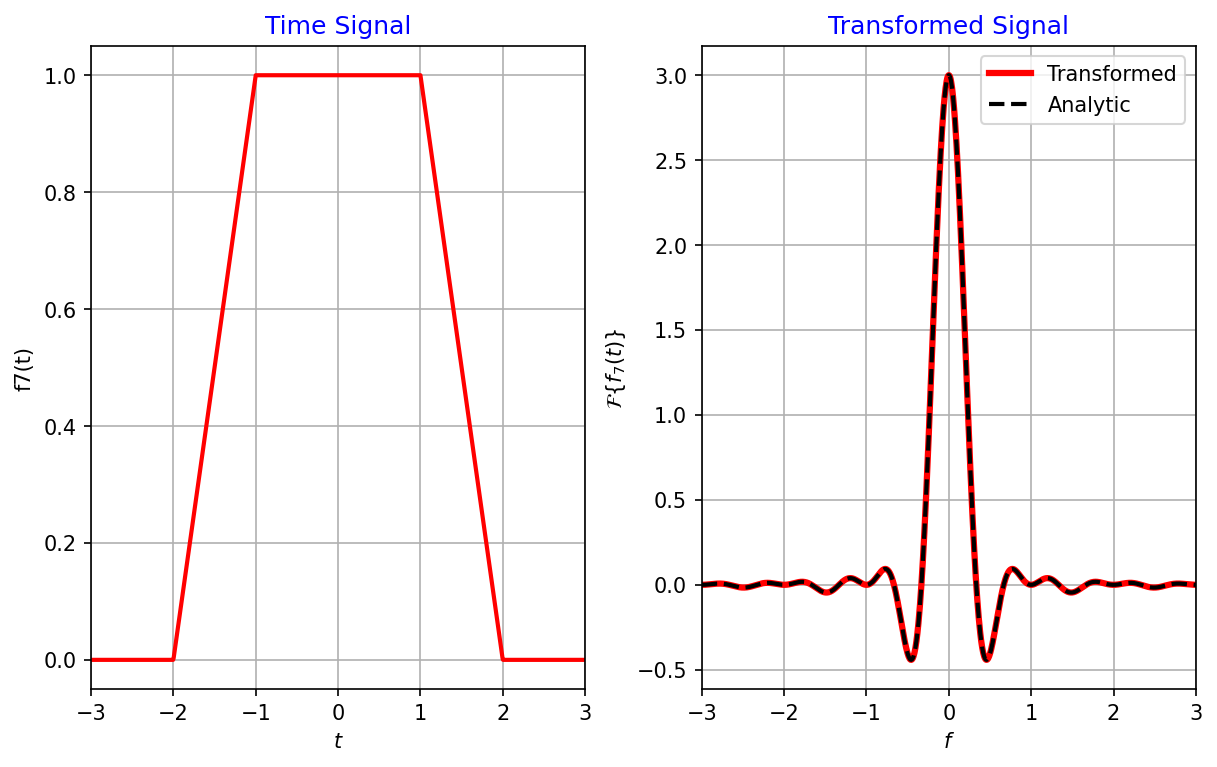

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5), dpi=150)
ax1.plot(tt, lam_f7(tt), 'r-', lw=2)
ax1.set_title('Time Signal')
ax1.set_ylabel('f7(t)')
ax1.set_xlabel('$t$')
    
ax2.plot(ff, lam_Q7(ff), 'r-', lw=3,label='Transformed')
ax2.plot(ff, Q7_analytic(ff), 'k--', lw=2,label='Analytic')
ax2.set_title('Transformed Signal')
ax2.set_ylabel('${\cal F}\{ f_7(t)\}$')
ax2.set_xlabel('$f$')
plt.legend()
plt.show()